## Library Imports

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.linear_model import Perceptron
from matplotlib.colors import ListedColormap

## Utility Functions

In [2]:
def euclidean_distance(point1,point2):
    x1 = point1[0] 
    y1 = point1[1]
    x2 = point2[0]
    y2 = point2[1]
    return math.sqrt((x2-x1)**2 + (y2-y1)**2)

def get_centroids(df,k):
    result_df = pd.DataFrame()
    if 'clusters' in df.columns:
        groups = df.groupby('clusters')
        for group in groups:
            print(group)
            result_df = result_df.append(group.sample())
    else:
        for _ in range(k):
            result_df = result_df.append(df.sample())
    return result_df

def plot_result(operation_df,epoch):
    plt.figure(figsize=(10,6))
    plt.title(f'Epoch {epoch+1}')
    names = ['Setosa','Versicolor','Virginica']

    groups = operation_df.groupby('cluster')

    for name,group in groups:
        plt.scatter(group.petal_length, group.petal_width, marker='o',label=name,color=name)

    plt.legend()
    plt.show()
    
def clustering(operation_df,centroids_df,cluster_colors):
    clusters = []
    operation_matrix = operation_df.to_numpy().tolist()
    
    centroid_list = centroids_df.to_numpy().tolist()

    for row in operation_matrix:
        distance_list = []
        for centroid in centroid_list:
            distance = euclidean_distance(row,centroid)
            distance_list.append(distance)
        min_index = distance_list.index(min(distance_list))
        clusters.append(cluster_colors[min_index])
    
    operation_df['cluster'] = clusters
    return operation_df


    r1 = (x1-t1[0])**2+(x2-t1[0])**2
    r2 = (x1-t2[0])**2+(x2-t2[0])**2
    return [round(math.exp(-r1),1),round(math.exp(-r2),1)]

def find_std_dev(targets):
    answer = []
    for target in targets:
        t_x , t_y = target
        std_dev = 0
        for t in targets:
            ti_x,ti_y = t
            std_dev += (t_x - ti_x)**2 + (t_y - ti_y)**2 #(square of euclidean distance)
        std_dev /= len(targets)
        std_dev = std_dev ** (1/2)
        answer.append(std_dev)
    return answer


def activation_function(x,s=1):
    return 1/(1+math.exp(-s*x))

def activation_func_derivate(f,s=1):
    return s*f*(1-f)

## Reading the dataset

In [3]:
df = pd.read_csv('iris_dataset.csv')
print(df)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


## Encoding the string column species

In [4]:
le = LabelEncoder()
df['species'] = le.fit_transform(df['species']) 

## Showing data is linearly inseparable for Versicolor classification

In [5]:
x = df.iloc[:, [2,3]].values # Data Preprocessing
y = (df['species'] == 1).astype(np.int) # we are picking Setosa to be 1 and all other classes will be 0 

In [6]:
perceptron = Perceptron(random_state = 0)
perceptron.fit(x, y)
predicted = perceptron.predict(x)

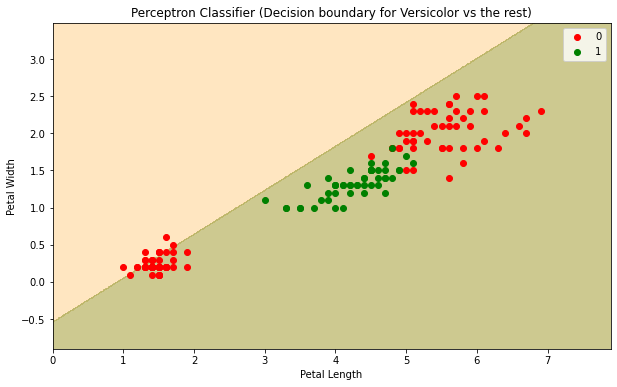

In [7]:
plt.figure(figsize = (10, 6))
X_set, y_set = x, y
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, perceptron.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('navajowhite', 'darkkhaki')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Perceptron Classifier (Decision boundary for Versicolor vs the rest)')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

## Creating Radial Basis Function


We now try to create a 3 dimensional mapping using RBF to see if it is separable in three dimensions

### Inputs

150 records of 2 features each(Petal Width, Petal Length)

### Outputs

Three dimensional representation of seperation plane for the two

## Steps to be followed

1. K Means clustering of dataset into 3 clusters
2. Finding the centroids i.e. the receptors 
3. Find the standard deviation based on centroids
4. Applying Gaussian RBF to find out the outputs at each neuron

## Do Clustering

#### Initial Dataset

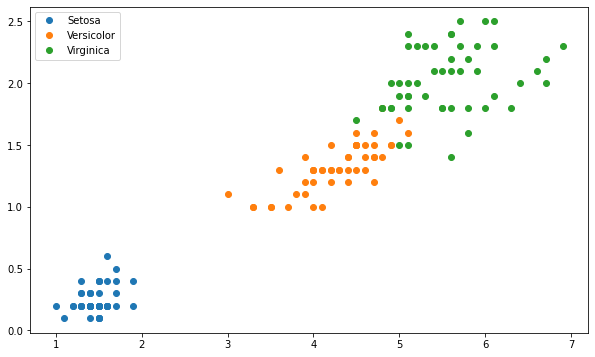

In [8]:
plt.figure(figsize=(10,6))
names = ['Setosa','Versicolor','Virginica']
groups = df.groupby('species')
for name, group in groups:
    plt.plot(group.petal_length, group.petal_width, marker='o', linestyle='', label=names[name])
plt.legend()
plt.show()

<ipython-input-2-3b2f042aa9de>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  operation_df['cluster'] = clusters


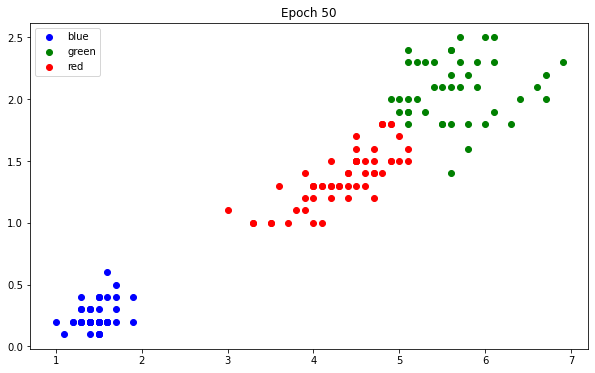

In [9]:
k = 3
cluster_colors = ['red','green','blue']
number_of_epochs = 50

operation_df = df.iloc[:,[2,3]] # Data Preprocessing

for epoch in range(number_of_epochs):
    centroids_df = get_centroids(operation_df,k)
    operation_df = clustering(operation_df,centroids_df,cluster_colors)
plot_result(operation_df,epoch)

In [10]:
print(centroids_df)

     petal_length  petal_width cluster
54            4.6          1.5     red
139           5.4          2.1     red
13            1.1          0.1   green


In [11]:
receptors = centroids_df.to_numpy().tolist()

In [12]:
print(receptors)

[[4.6, 1.5, 'red'], [5.4, 2.1, 'red'], [1.1, 0.1, 'green']]


In [13]:
temp_receptors = []

for receptor in receptors:
    temp_receptors.append(receptor[:-1])
    
print(temp_receptors)

receptors = temp_receptors

[[4.6, 1.5], [5.4, 2.1], [1.1, 0.1]]


## Finding the deviations

In [14]:
std_deviations = find_std_dev(receptors)
print(std_deviations)

[2.25166604983954, 2.7982137159266447, 3.497618237219913]


## Finding hidden layer output

In [15]:
output_matrix = []

for index,record in operation_df.iterrows():
    x,y = record[:-1]
    output_row = []
    
    index = 0
    for receptor in receptors:
        t_x,t_y = receptor
        r = (x-t_x)**2 + (y-t_y)**2
        r /= 2*(std_deviations[index]**2)
        index += 1
        result = math.exp(-r)
        output_row.append(result)
    output_matrix.append(output_row)

In [16]:
for output in output_matrix:
    print(output)

[0.3083472797295245, 0.28586517550980983, 0.9959211477467891]
[0.3083472797295245, 0.28586517550980983, 0.9959211477467891]
[0.28920162675152145, 0.27145493692920913, 0.9979584899918379]
[0.32811260483499755, 0.30065615936092016, 0.9930758542488183]
[0.3083472797295245, 0.28586517550980983, 0.9959211477467891]
[0.3872371632498163, 0.34688970465699703, 0.9817757368662843]
[0.3160440212772119, 0.2926997561872086, 0.9947007393857829]
[0.32811260483499755, 0.30065615936092016, 0.9930758542488183]
[0.3083472797295245, 0.28586517550980983, 0.9959211477467891]
[0.31949117046438713, 0.2932610211279287, 0.9934818265212533]
[0.32811260483499755, 0.30065615936092016, 0.9930758542488183]
[0.34845693420096263, 0.31580885571950096, 0.989429560934623]
[0.3002451958827877, 0.27883384612215656, 0.9963282831834096]
[0.24625672969038553, 0.23784334422063186, 1.0]
[0.2707102781228269, 0.2574421076836854, 0.9991828953198919]
[0.34401805277651337, 0.3148021340495601, 0.9898340425918383]
[0.3032208425668089,

In [17]:
operation_df['target'] = (df['species'] == 1).astype(np.int)
operation_df

<ipython-input-17-e73e28a382ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  operation_df['target'] = (df['species'] == 1).astype(np.int)


,petal_length,petal_width,cluster,target
0,1.4,0.2,blue,0
1,1.4,0.2,blue,0
2,1.3,0.2,blue,0
3,1.5,0.2,blue,0
4,1.4,0.2,blue,0
...,...,...,...,...
145,5.2,2.3,green,0
146,5.0,1.9,green,0
147,5.2,2.0,green,0
148,5.4,2.3,green,0


In [18]:
learning_rate = 0.0005 #because most of records are in range (0.4,0.6).. more learning rate meant false positives
number_of_epochs = 0
max_iterations = 10000

number_of_classes = 1
weight_matrix = np.random.rand(np.asarray(output_matrix).shape[1],number_of_classes)
weight_matrix
while number_of_epochs < max_iterations:
    for index,record in operation_df.iterrows():
        output = 0
        for j in range(weight_matrix.shape[0]):
            output += weight_matrix[j][0]*output_matrix[index][j]
        output = activation_function(output)
        error_correction_term = 0 #default
        if(output>0.5 and record[-1]==0): #wrong classification, update weights
            error_correction_term = -1*activation_func_derivate(output)
        if(output<0.5 and record[-1]==1):
            error_correction_term = 1*activation_func_derivate(output)
        
        for j in range(weight_matrix.shape[0]):
            for i in range(weight_matrix.shape[1]):
                weight_matrix[j][i] += learning_rate*error_correction_term*output_matrix[index][j]
#         print(output,(output>0.5) == (record[-1]==1))
#         print(error_correction_term)
#         print(weight_matrix)    
    number_of_epochs += 1

In [19]:
print(weight_matrix[2][0])

-0.030086473916670527


In [20]:
count_yes = 0
count_no = 0

for index,record in operation_df.iterrows():
    output = 0
    for j in range(weight_matrix.shape[0]):
        output += weight_matrix[j][0]*output_matrix[index][j]
    output = activation_function(output)
    if(output>0.5):
        count_yes += 1
    else:
        count_no += 1
        
print(count_yes,count_no)

48 102


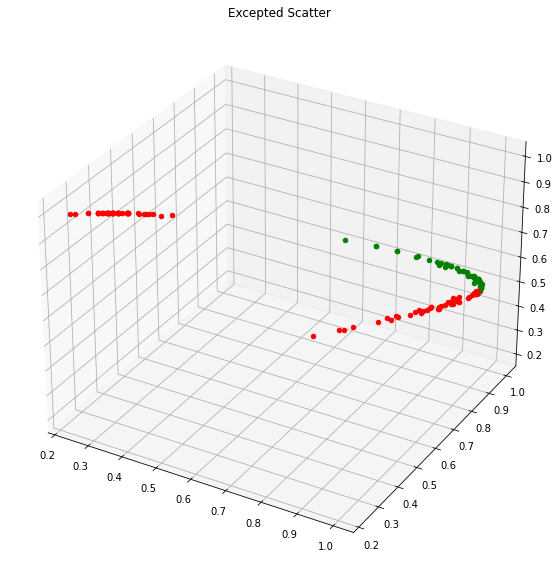

In [21]:
plt.figure(figsize=(10,10)) 
  
ax = plt.axes(projection ='3d') 

for index,record in operation_df.iterrows():
    i = record[-1]
    x_plot = output_matrix[index][0]
    y_plot = output_matrix[index][1]
    z_plot = output_matrix[index][2]
    ax.scatter(x_plot, y_plot, z_plot,color = ListedColormap(('red', 'green'))(i))
    
ax.set_title('Excepted Scatter') 
plt.show() 

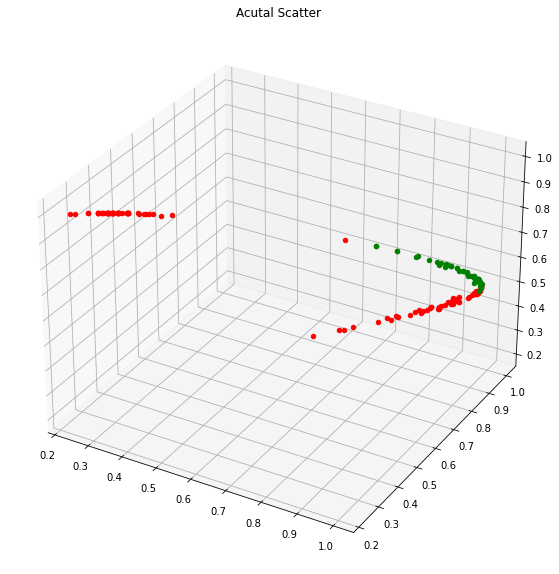

In [22]:
plt.figure(figsize=(10,10)) 
  
ax = plt.axes(projection ='3d') 


for index,record in operation_df.iterrows():
    output = 0
    for j in range(weight_matrix.shape[0]):
        output += weight_matrix[j][0]*output_matrix[index][j]
    output = activation_function(output)
    if(output>0.5):
        i = 1
    else:
        i = 0
    x_plot = output_matrix[index][0]
    y_plot = output_matrix[index][1]
    z_plot = output_matrix[index][2]
    ax.scatter(x_plot, y_plot, z_plot,color = ListedColormap(('red', 'green'))(i))
    
ax.set_title('Acutal Scatter') 
plt.show() 

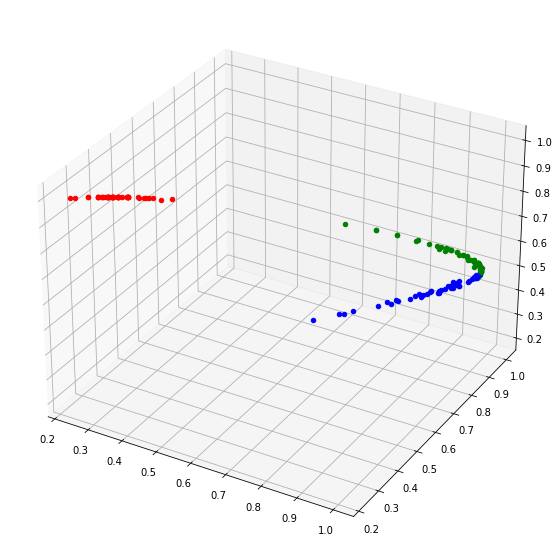

In [23]:
plt.figure(figsize=(10,10))
names = ['Setosa','Versicolor','Virginica']
ax = plt.axes(projection ='3d') 
for index,record in df.iterrows():
    i = record['species']
    x_plot = output_matrix[index][0]
    y_plot = output_matrix[index][1]
    z_plot = output_matrix[index][2]
    ax.scatter(x_plot, y_plot, z_plot,color = ListedColormap(('red', 'green','blue'))(int(i)))

plt.show()